# Machine Learning Assignment 2

Muhammad Ghulam Abbas (29417) and Muhammad Adnan Ali(29401)

This project analyze the effects of different techniques on the performance of machine learning models for regression and classification tasks using four datasets. The analysis focuses on evaluating the impact of cross-validation and feature selection methods, including filter, wrapper, and PCA.

# k Nearest Neighbours

In this project, I build a k Nearest Neighbours classifier to classify the patients suffering from Breast Cancer. I have used the Breast Cancer Wisconsin Data Set.

# Dataset Description

The attribute information of this dataset is as follows:-

1.diagnosis

2.radius_mean

3.texture_mean

4.perimeter_mean

5.area_mean

6.smoothness_mean

7.compactness_mean

8.concavity_mean

9.concave points_mean

10.symmetry_mean

11.fractal_dimension_mean

12.radius_se

13.texture_se

14.perimeter_se

15.area_se

16.smoothness_se

17.compactness_se

18.concavity_se

19.concave points_se

20.symmetry_se

21.fractal_dimension_se

22.radius_worst

23.texture_worst

24.perimeter_worst

25.area_worst

26.smoothness_worst

27.compactness_worst

28.concavity_worst

29.concave points_worst

30.symmetry_worst

31.fractal_dimension_worst


# Import packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a pandas DataFrame
file_path = "C:/Users/lenovo1/Downloads/Classification.CancerMB.csv"
df= pd.read_csv(file_path)

In [3]:
df.shape


(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The diagnosis column is categorical, whereas the remaining columns contain continuous values.


In [7]:
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As we can see, the dataset has no missing values

# Drop redundant columns
We should drop any redundant columns from the dataset which does not have any predictive power. Here, Id and unamed:32 is the redundant column. So, I will drop it first.

In [8]:
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)


In [9]:
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
round(df['diagnosis'].value_counts()*100/df['diagnosis'].value_counts().sum(), 2)


B    62.74
M    37.26
Name: diagnosis, dtype: float64

# Exploratory Data Analysis
 

<Axes: xlabel='diagnosis', ylabel='count'>

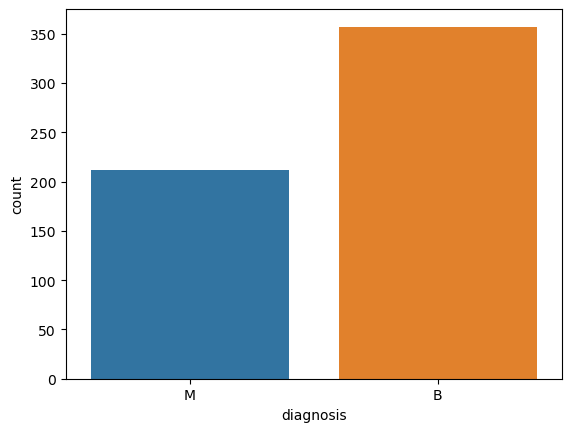

In [11]:
sns.countplot(x='diagnosis', data=df)


There is a slight imbalance in the data. But it is fine in this case

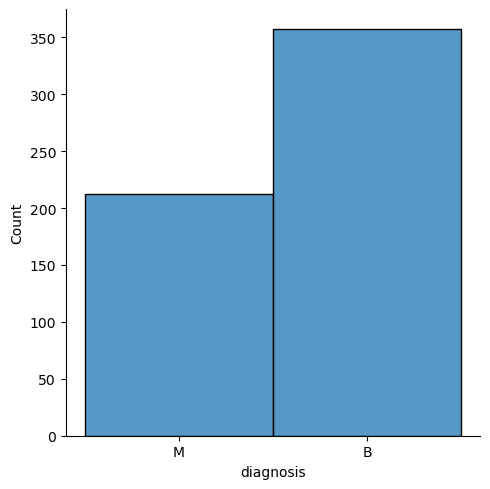

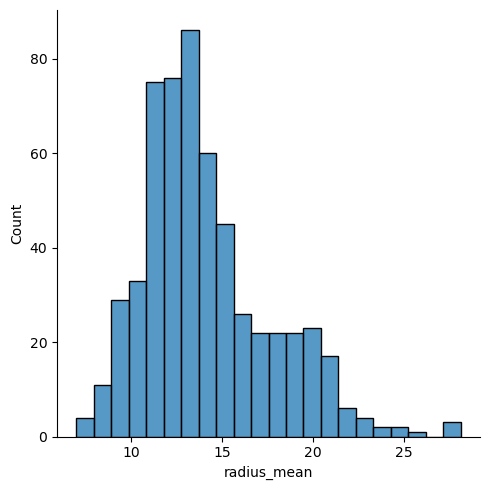

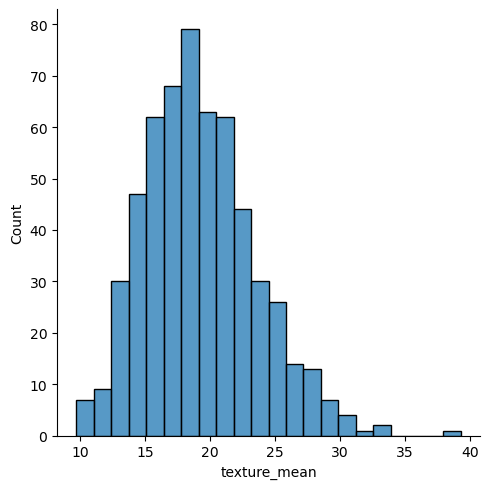

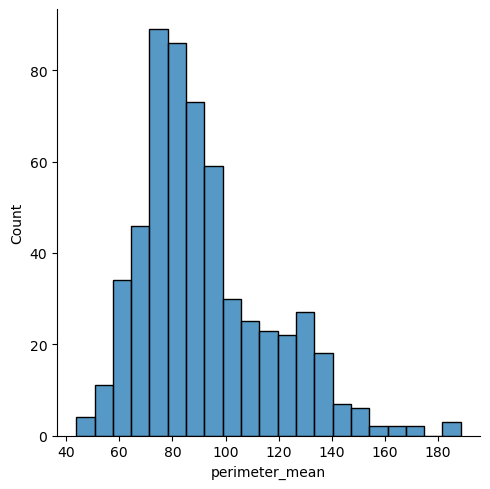

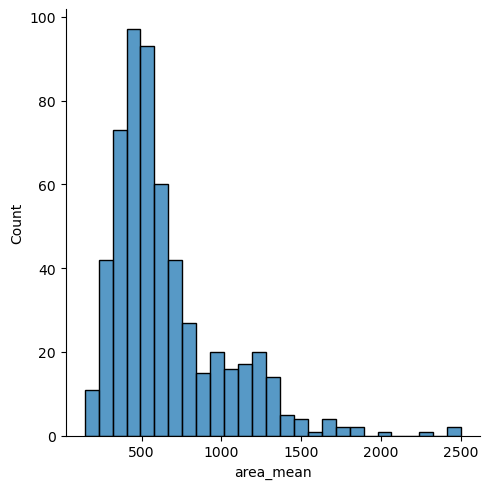

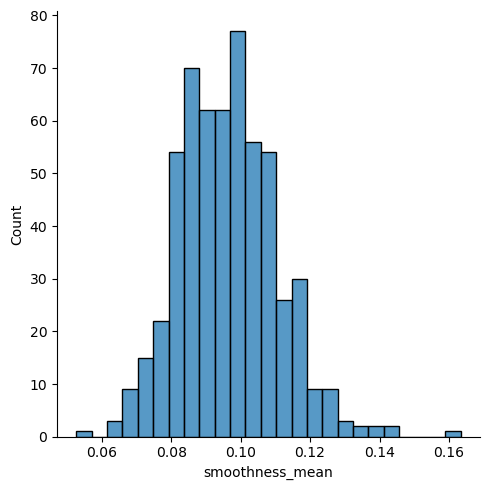

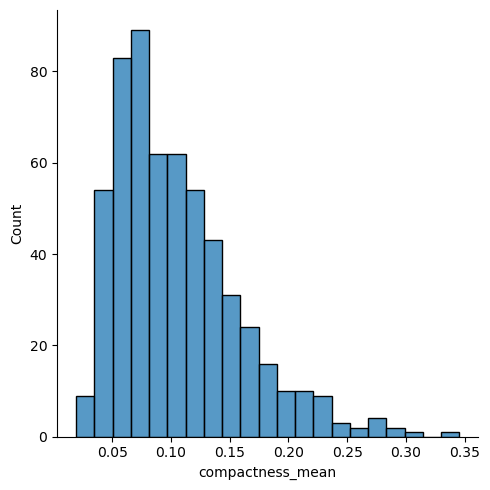

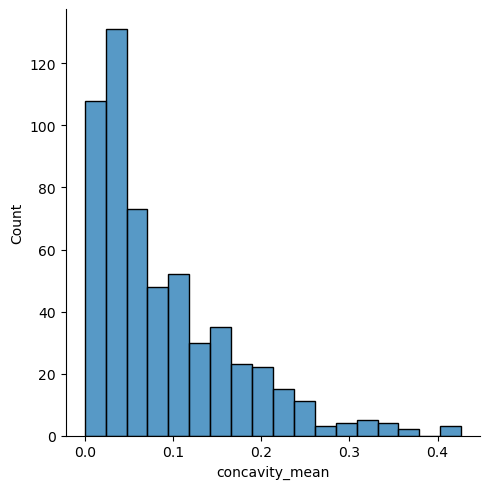

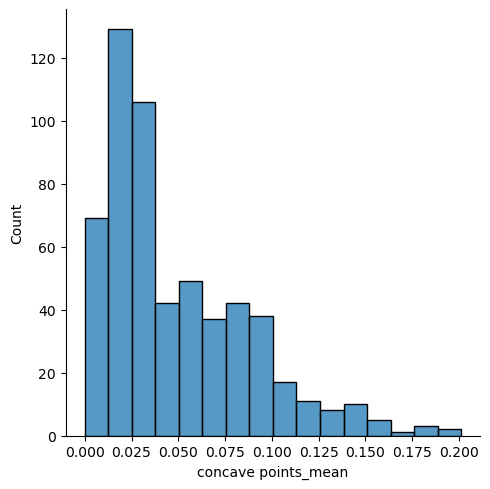

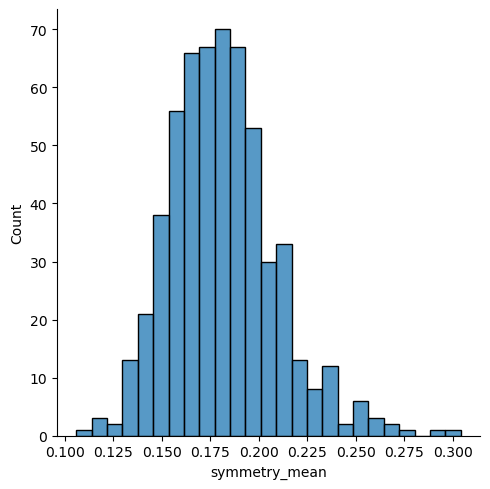

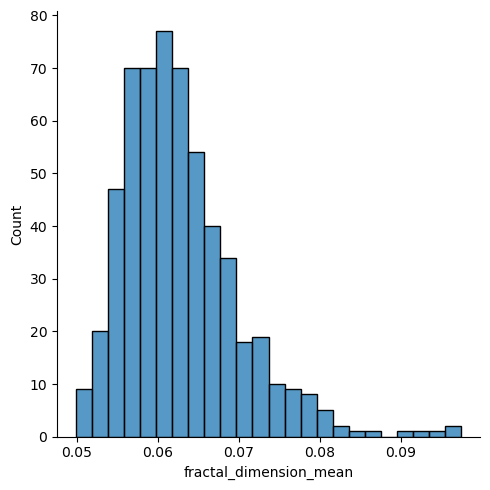

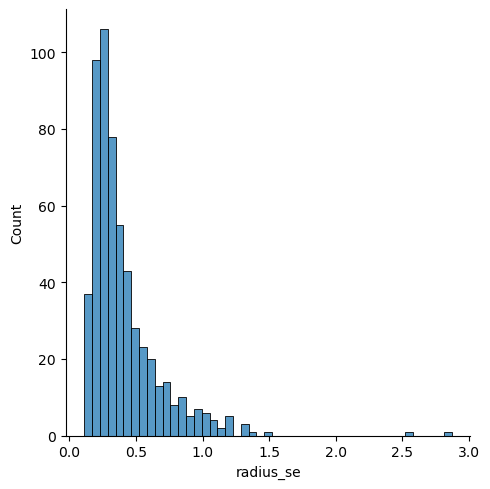

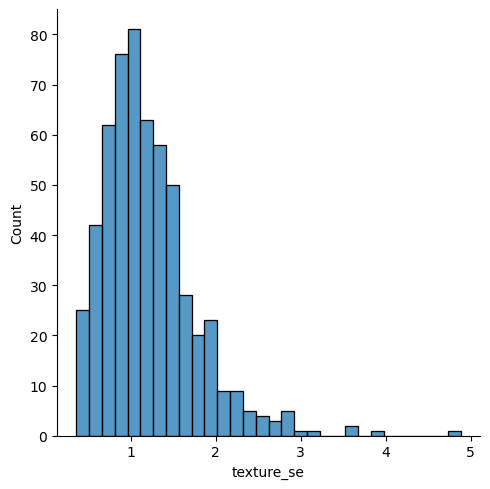

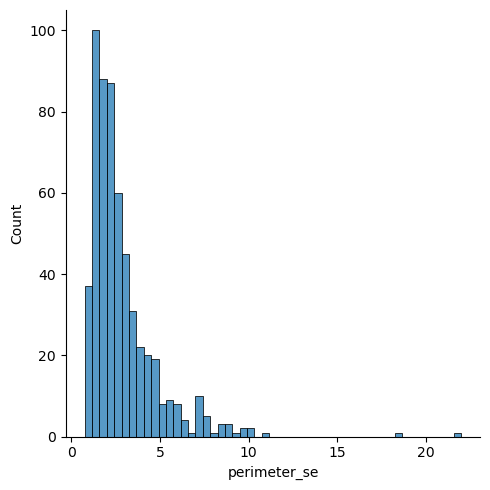

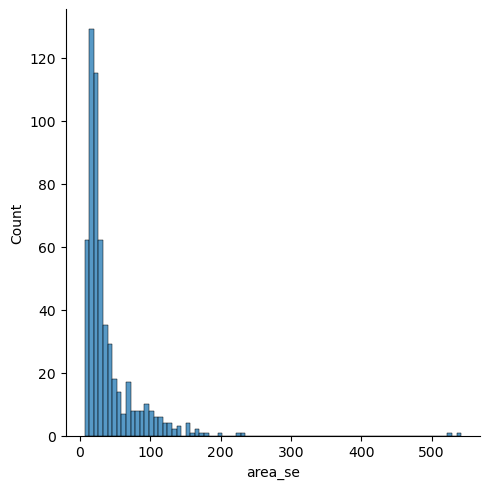

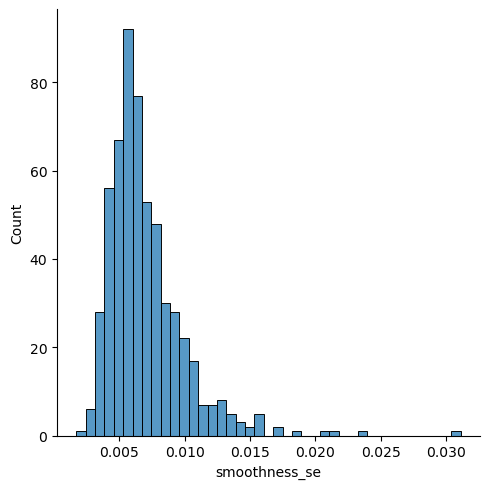

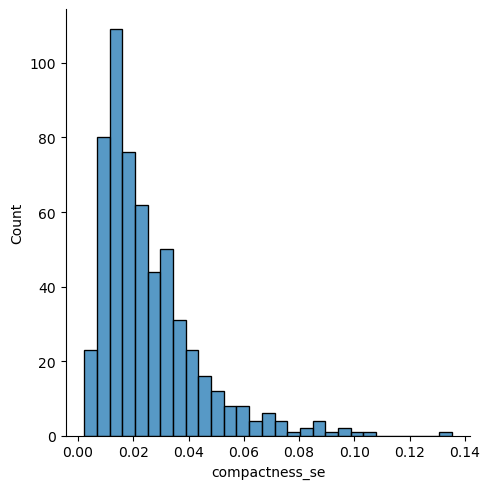

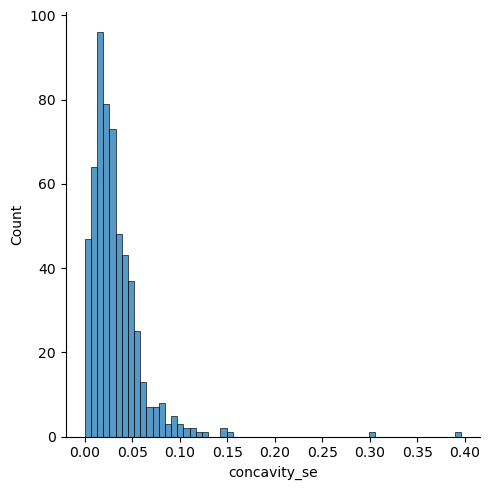

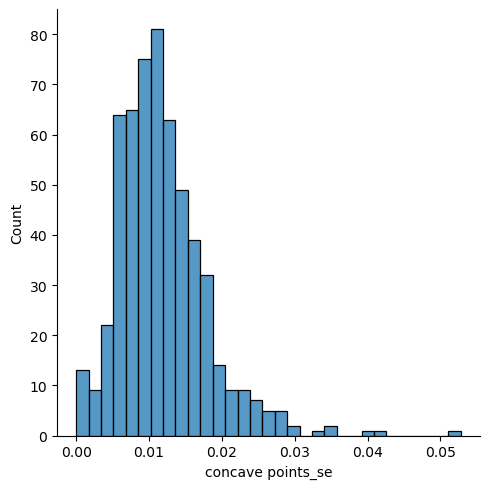

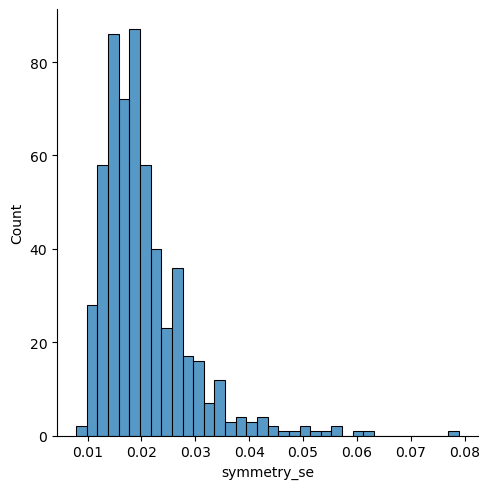

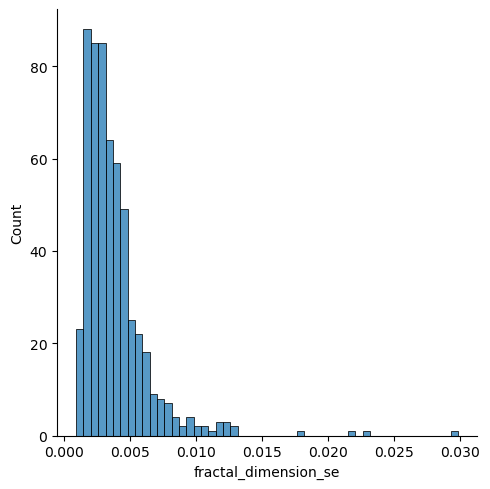

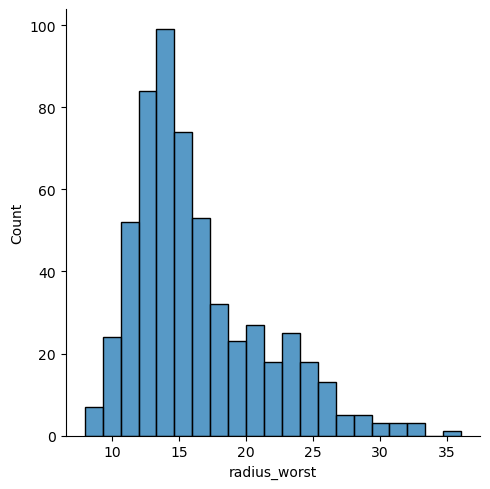

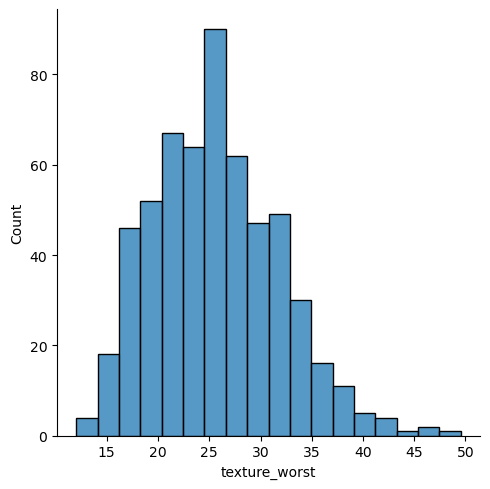

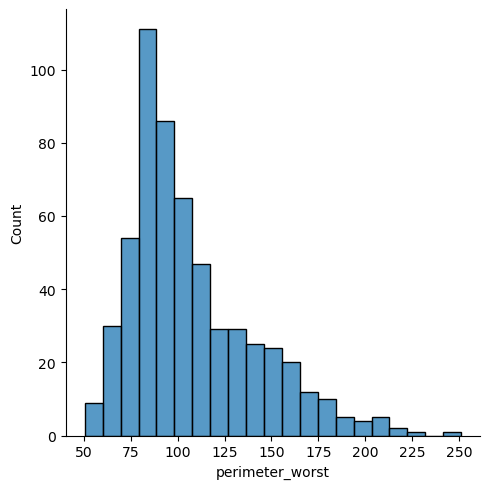

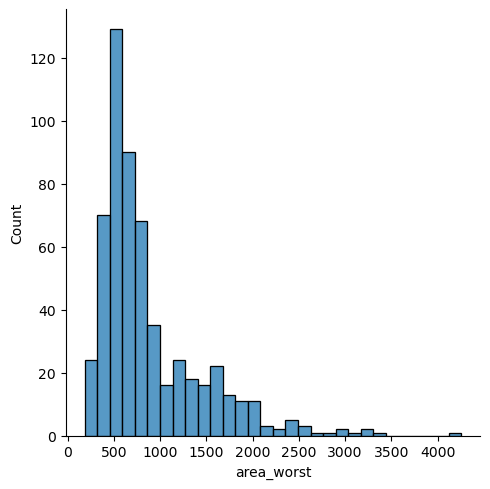

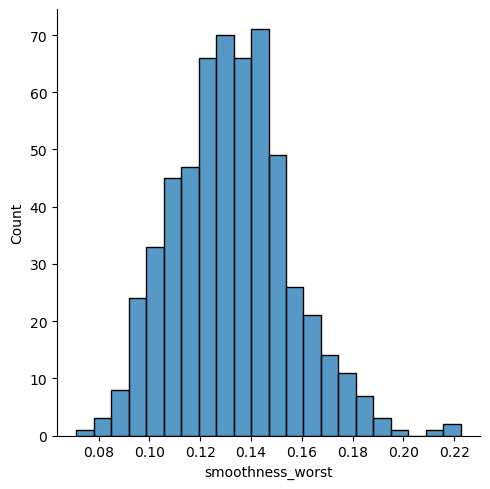

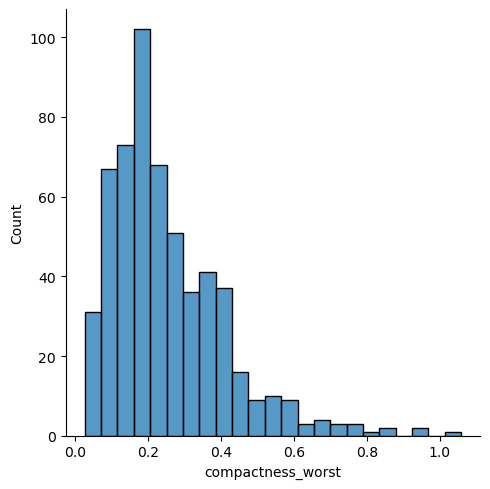

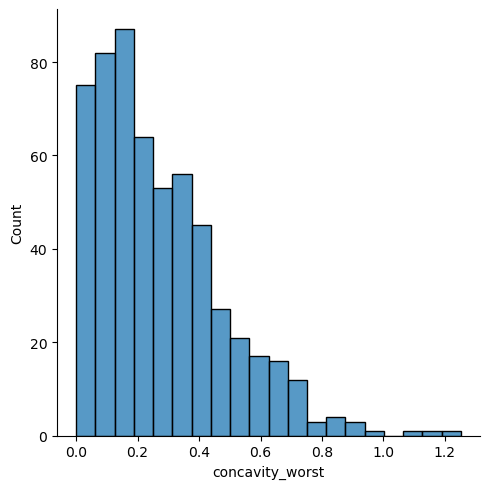

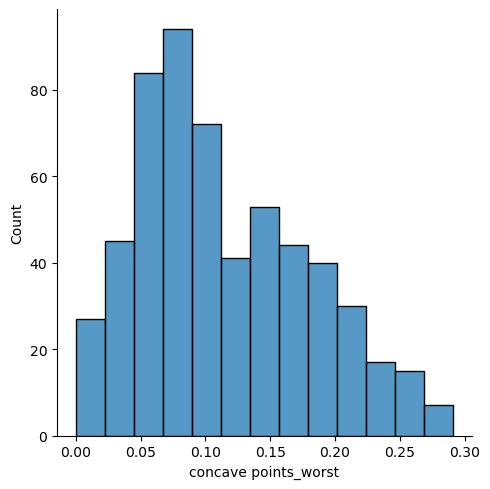

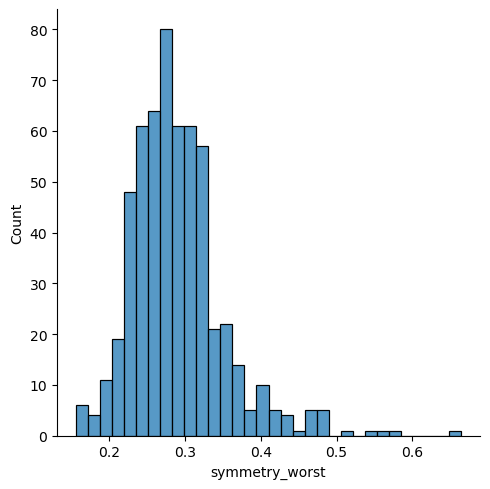

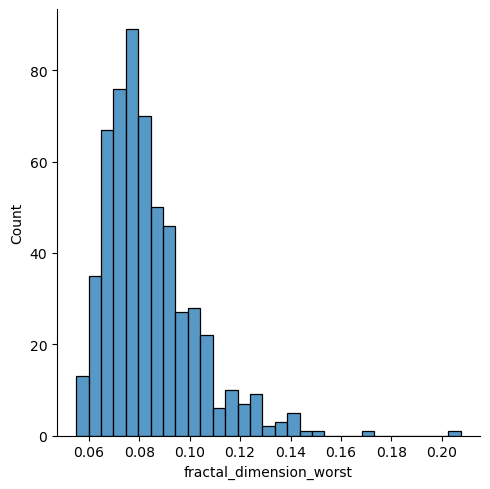

In [12]:
for column in df:
  sns.displot(x=column, data=df)

<Axes: xlabel='radius_mean', ylabel='Density'>

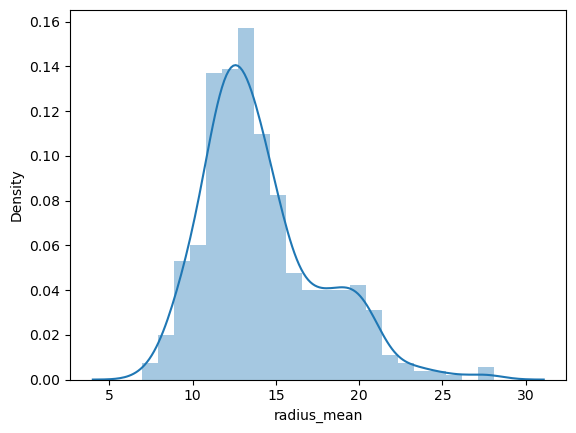

In [13]:
sns.distplot(df.radius_mean)


Inference about distribution: Most of the features are right skewed

In [14]:
df.describe().iloc[:,1:9].T[['mean','50%']]


,mean,50%
texture_mean,19.289649,18.84000
perimeter_mean,91.969033,86.24000
area_mean,654.889104,551.10000
smoothness_mean,0.096360,0.09587
compactness_mean,0.104341,0.09263
concavity_mean,0.088799,0.06154
concave points_mean,0.048919,0.03350
symmetry_mean,0.181162,0.17920


# CORRELATION:-


In [15]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder= LabelEncoder()
df['diagnosis'] = Label_Encoder.fit_transform(df['diagnosis'])

In [17]:
corr = df.corr()
corr_values = corr['diagnosis'].sort_values().round(3)
corr_values

smoothness_se             -0.067
fractal_dimension_mean    -0.013
texture_se                -0.008
symmetry_se               -0.007
fractal_dimension_se       0.078
concavity_se               0.254
compactness_se             0.293
fractal_dimension_worst    0.324
symmetry_mean              0.330
smoothness_mean            0.359
concave points_se          0.408
texture_mean               0.415
symmetry_worst             0.416
smoothness_worst           0.421
texture_worst              0.457
area_se                    0.548
perimeter_se               0.556
radius_se                  0.567
compactness_worst          0.591
compactness_mean           0.597
concavity_worst            0.660
concavity_mean             0.696
area_mean                  0.709
radius_mean                0.730
area_worst                 0.734
perimeter_mean             0.743
radius_worst               0.776
concave points_mean        0.777
perimeter_worst            0.783
concave points_worst       0.794
diagnosis 

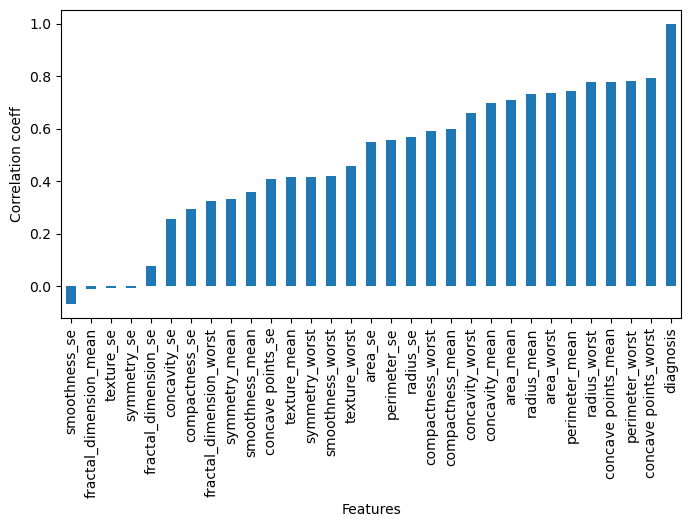

In [18]:
plt.figure(figsize=(8,4))
corr_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation coeff')
plt.show()

In [19]:
corr.round(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


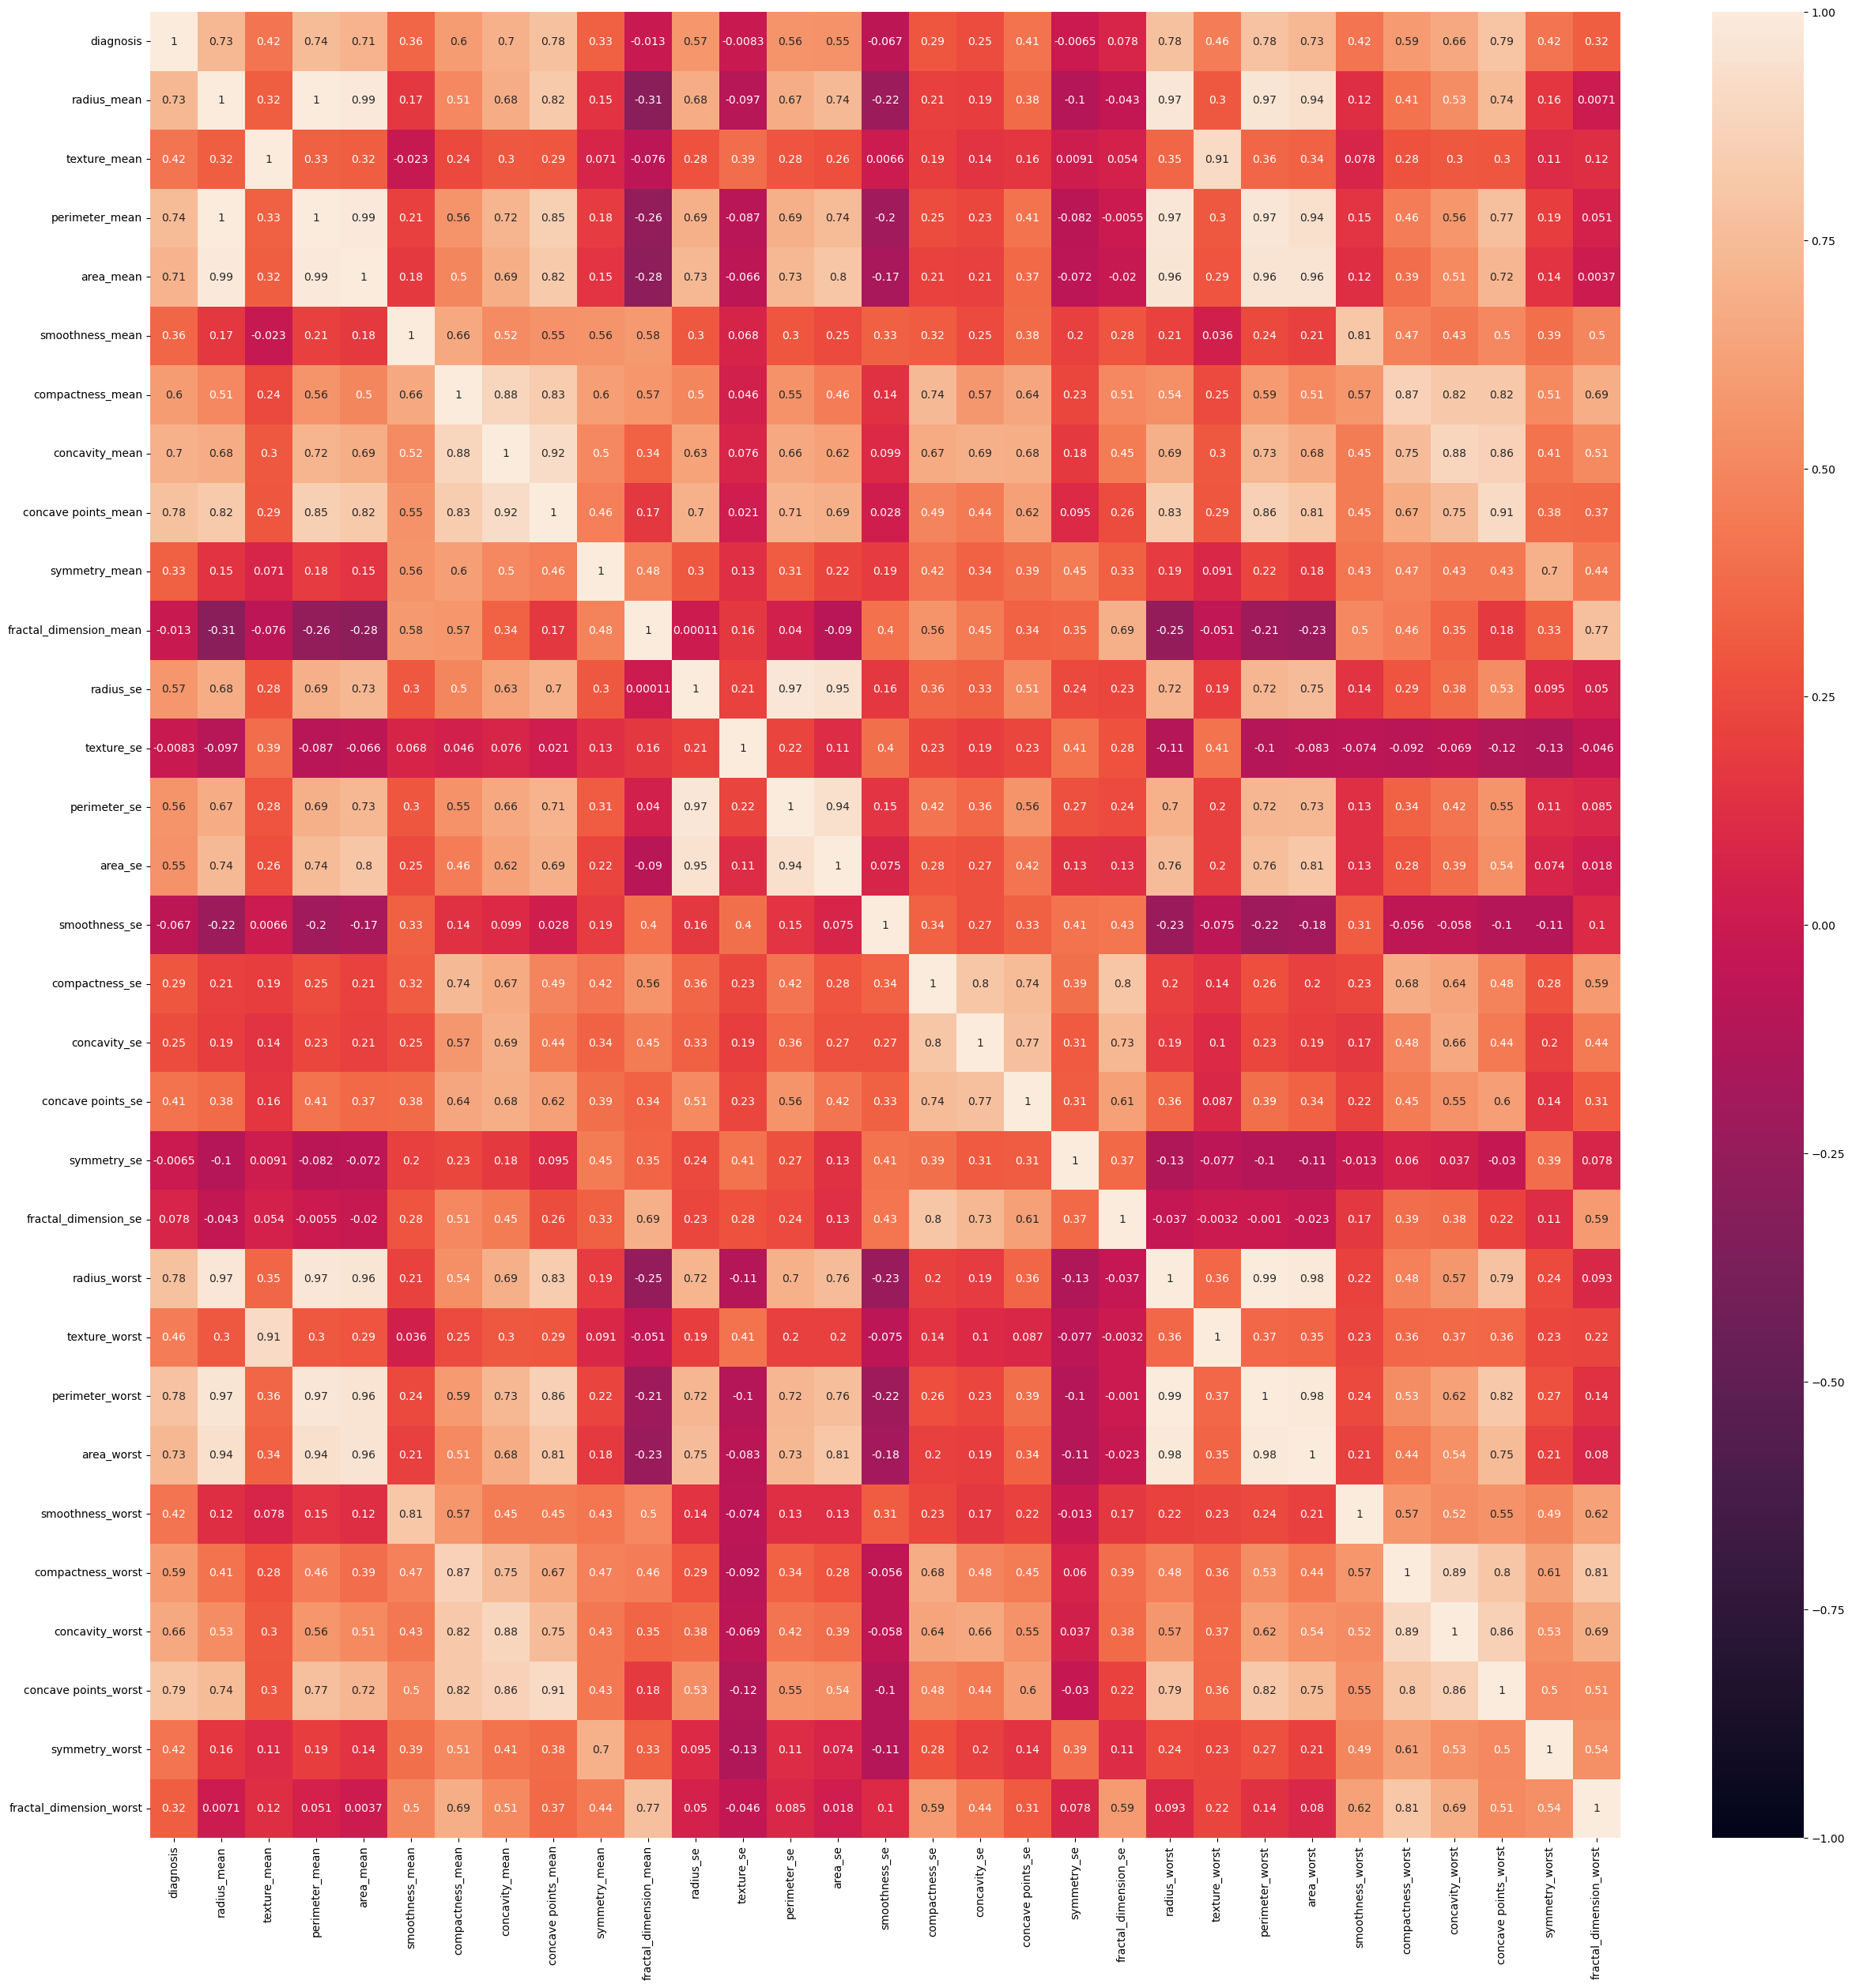

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
plt.figure(figsize =(30,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

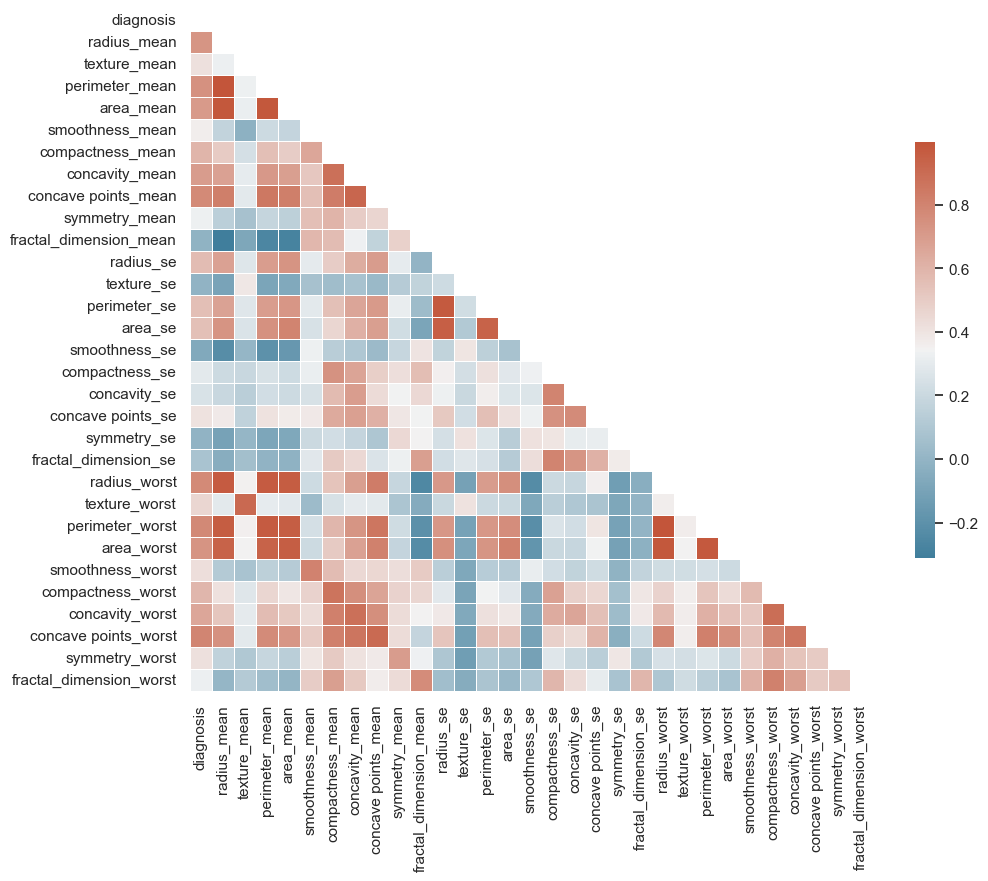

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()


Radius, Area and Perimeter are correlated.

Compactness_mean,concavity_mean,concave_points_mean are highy correlated

Texture_mean and texture worst are  also higly correlated


# Detecting outliers and anomalies


In [22]:

def identify_outliers(df):
    outliers_dict = {}
    for column_name in df.columns:
        q25, q75 = np.percentile(df[column_name], 25), np.percentile(df[column_name], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in df[column_name] if x < lower or x > upper]
        outliers_dict[column_name] = len(outliers)
    return outliers_dict

# Example usage:
# Assuming df is your DataFrame
outliers_info = identify_outliers(df)
print("Number of outliers in each column:")
print(outliers_info)


Number of outliers in each column:
{'diagnosis': 0, 'radius_mean': 14, 'texture_mean': 7, 'perimeter_mean': 13, 'area_mean': 25, 'smoothness_mean': 6, 'compactness_mean': 16, 'concavity_mean': 18, 'concave points_mean': 10, 'symmetry_mean': 15, 'fractal_dimension_mean': 15, 'radius_se': 38, 'texture_se': 20, 'perimeter_se': 38, 'area_se': 65, 'smoothness_se': 30, 'compactness_se': 28, 'concavity_se': 22, 'concave points_se': 19, 'symmetry_se': 27, 'fractal_dimension_se': 28, 'radius_worst': 17, 'texture_worst': 5, 'perimeter_worst': 15, 'area_worst': 35, 'smoothness_worst': 7, 'compactness_worst': 16, 'concavity_worst': 12, 'concave points_worst': 0, 'symmetry_worst': 23, 'fractal_dimension_worst': 24}


The feature with the highest number of outliers is 'area_se', with 65 outliers.

The feature with the lowest number of outliers'concave points_worst' has 0 outliers.

'Diagonis'column likely represents a categorical variable, and no outliers were found.

This makes sense as categorical variables don't typically have outliers.

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [24]:
scaled_data

array([[ 1.29767572,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.29767572,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.29767572,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 1.29767572,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.29767572,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.77060855, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Model Selection


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
# Split data into features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their accuracy on the test set
print(models_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.50it/s]


[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.01it/s]

[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

# Model Training Before Cross Validation


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9123


In [27]:
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [28]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-score for each class:", f1)

Precision for each class: [0.93846154 0.87755102]
Recall for each class: [0.91044776 0.91489362]
F1-score for each class: [0.92424242 0.89583333]


In [29]:
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy:', accuracy)

Overall accuracy: 0.9122807017543859


In [30]:
# Assuming y_pred contains probability estimates of the positive class
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.9126706891076531


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        67
           1       0.88      0.91      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



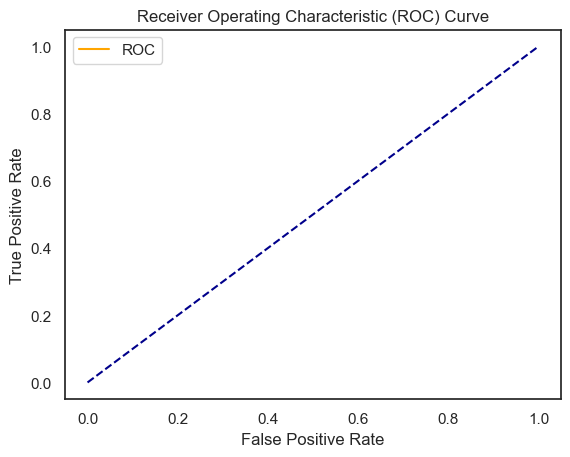

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Model Training After Cross Validation


----------------------------------------------------------------

Calculated Scores for K neighborhood value 10, KFold (cv) value 10 :

  [0.9122807  0.85964912 0.89473684 0.94736842 0.94736842 0.94736842
 0.96491228 0.94736842 0.9122807  0.92857143]

----------------------------------------------------------------

Avarage Trust : 0.9261904761904761

----------------------------------------------------------------

Average error rate:  0.07380952380952388

----------------------------------------------------------------

Sensitivity :  92.619

----------------------------------------------------------------

Specificity :  90.56299999999999

----------------------------------------------------------------

Average scores achieved for K between 1 and 20: 

  [0.9156954887218045, 0.9121240601503761, 0.9261904761904761, 0.9227130325814535, 0.9297619047619046, 0.9297619047619048, 0.9279761904761905, 0.924436090225564, 0.9262531328320801, 0.9227130325814535, 0.9297619047619046, 0.92797619

Text(0.5, 1.0, 'Observing the best value for K')

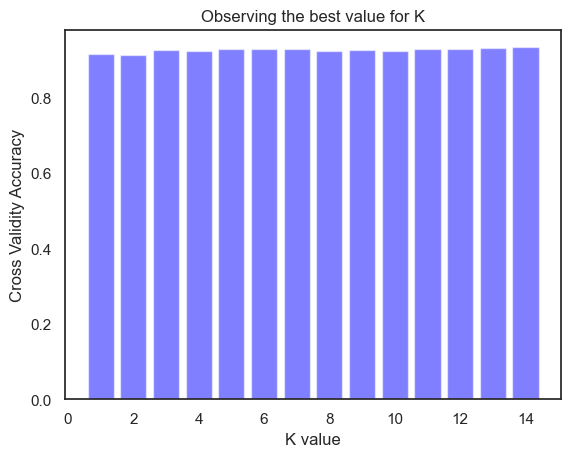

In [33]:
from sklearn.model_selection import cross_val_score
skor = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#calculation of sensitivity 
Rscores= cross_val_score(knn, X, y, cv=10, scoring='recall_weighted')
sensitivity=round((Rscores.mean()*100),3)


#calculation of balanced_accuracy 
Sscores= cross_val_score(knn, X, y, cv=10, scoring='balanced_accuracy')
balanced_accuracy=round((Sscores.mean()*100),3)


print("\n----------------------------------------------------------------")
print("\nCalculated Scores for K neighborhood value 10, KFold (cv) value 10 :\n\n ",skor)
print("\n----------------------------------------------------------------")
print("\nAvarage Trust :", skor.mean())
print("\n----------------------------------------------------------------")
print("\nAverage error rate: ",1-skor.mean())
print("\n----------------------------------------------------------------")
print("\nSensitivity : ",sensitivity)
print("\n----------------------------------------------------------------")
print("\nSpecificity : ",balanced_accuracy*2-sensitivity )
print("\n----------------------------------------------------------------")

# We compute the values for the k values in the range
k_range = range(1, 15)
k_scores = []

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
	#Up to 10 kfold is applied
 #The average value in each fold operation is kept in k_scores
	skor = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
	k_scores.append(skor.mean())
print("\nAverage scores achieved for K between 1 and 20: \n\n ",k_scores)

# To display the best K number, we give K values from 1 to 10 and plot the results on the graph.
plt.bar(k_range,k_scores,color='blue',align='center', alpha=0.5)
plt.xlabel('K value')
plt.ylabel('Cross Validity Accuracy')
plt.title('Observing the best value for K')


In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate the model with a specific K value
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training set
knn.fit(X_train, y_train)

# Evaluate accuracy on the test set before cross-validation
y_pred_test = knn.predict(X_test)
accuracy_before_cv = accuracy_score(y_test, y_pred_test)
print("Accuracy before cross-validation:", accuracy_before_cv)

# Perform cross-validation to evaluate model accuracy
skor_cv = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Calculate mean accuracy after cross-validation
accuracy_after_cv = skor_cv.mean()
print("Accuracy after cross-validation:", accuracy_after_cv)


Accuracy before cross-validation: 0.9122807017543859
Accuracy after cross-validation: 0.9261904761904761


The results show that the accuracy of the K-nearest neighbors (KNN) model improved slightly after performing cross-validation.

Accuracy before cross-validation: The accuracy of the KNN model when evaluated on the separate test set before cross-validation is approximately 91.23%. This indicates that when the model was trained on a portion of the data and tested on a separate unseen portion, it achieved an accuracy of about 91.23%.

Accuracy after cross-validation: The accuracy of the KNN model when evaluated through cross-validation is approximately 92.62%. This value represents the average accuracy across multiple folds of cross-validation, where the model was trained and tested on different subsets of the data

# FEATURE SELECTION METHOD


# 1.FILTER METHOD:-

Variance Threshold

Variance thresholding is a technique used in feature selection to remove features with low variance from a dataset

In [35]:
variances = df.var()
variances


diagnosis                      0.23
radius_mean                   12.42
texture_mean                  18.50
perimeter_mean               590.44
area_mean                 123843.55
smoothness_mean                0.00
compactness_mean               0.00
concavity_mean                 0.01
concave points_mean            0.00
symmetry_mean                  0.00
fractal_dimension_mean         0.00
radius_se                      0.08
texture_se                     0.30
perimeter_se                   4.09
area_se                     2069.43
smoothness_se                  0.00
compactness_se                 0.00
concavity_se                   0.00
concave points_se              0.00
symmetry_se                    0.00
fractal_dimension_se           0.00
radius_worst                  23.36
texture_worst                 37.78
perimeter_worst             1129.13
area_worst                324167.39
smoothness_worst               0.00
compactness_worst              0.02
concavity_worst             

In [36]:
#Setting Threshold Value  0.1
from sklearn.feature_selection import VarianceThreshold

def apply_variance_threshold(X_train, threshold=0.1):
    var_thres = VarianceThreshold(threshold=threshold)
    var_thres.fit(X_train)
    selected_features = X_train.columns[var_thres.get_support()]
    non_constant_features_count = sum(var_thres.get_support())
    constant_columns = [column for column in X_train.columns if column not in selected_features]
    print("Number of non-constant features:", non_constant_features_count)
    print("Constant columns removed:", constant_columns)
    print("Selected features:", selected_features)
    return X_train[selected_features]

In [37]:
X_train_filtered = apply_variance_threshold(X_train, threshold=0.1)
X_train_filtered

Number of non-constant features: 11
Constant columns removed: ['smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Selected features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
338,10.05,17.53,64.41,310.80,2.02,1.78,16.85,11.16,26.84,71.98,384.00
427,10.80,21.98,68.79,359.90,1.62,2.24,20.20,12.76,32.04,83.69,489.50
406,16.14,14.86,104.30,800.00,0.64,1.73,21.83,17.71,19.58,115.90,947.90
96,12.18,17.84,77.79,451.10,1.51,2.41,24.44,12.83,20.92,82.14,495.20
490,12.25,22.44,78.18,466.50,1.14,1.58,18.04,14.17,31.99,92.74,622.90
...,...,...,...,...,...,...,...,...,...,...,...
277,18.81,19.98,120.90,1102.00,0.83,2.36,36.74,19.96,24.30,129.00,1236.00
9,12.46,24.04,83.97,475.90,1.60,2.04,23.94,15.09,40.68,97.65,711.40
359,9.44,18.32,59.82,278.60,1.25,3.27,30.48,12.02,25.02,75.79,439.60
192,9.72,18.22,60.73,288.10,4.88,2.23,21.69,9.97,20.83,62.25,303.80


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Updated selected features
selected = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
            'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
            'texture_worst', 'perimeter_worst', 'area_worst']

X = df[selected]  # Use only selected features
y = df['diagnosis']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report  # Return accuracy and classification report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.9123
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        67
           1       0.88      0.91      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



it implies that the removal of features with low variance did not significantly affect the model predictive performance.

# CORRELATION

<Axes: >

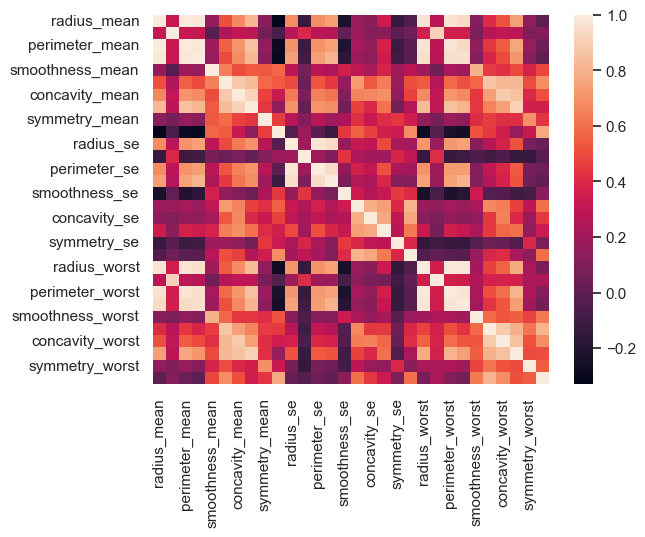

In [39]:
import seaborn as sns
sns.heatmap(X_train.corr())

In [40]:
def apply_pearson_correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    selected_features = [col for col in dataset.columns if col not in col_corr]
    return col_corr, selected_features

In [41]:
correlated_features, selected_features = apply_pearson_correlation(X_train, 0.5)
print("Number of correlated features:", len(correlated_features))
print("Number of selected features:", len(selected_features))
print("Correlated features:", correlated_features)
print("Selected features:", selected_features)

Number of correlated features: 24
Number of selected features: 6
Correlated features: {'perimeter_worst', 'fractal_dimension_mean', 'concave points_worst', 'symmetry_mean', 'area_worst', 'compactness_se', 'concavity_worst', 'concavity_se', 'concavity_mean', 'perimeter_se', 'smoothness_worst', 'concave points_mean', 'fractal_dimension_worst', 'radius_worst', 'radius_se', 'area_se', 'texture_worst', 'concave points_se', 'fractal_dimension_se', 'compactness_mean', 'compactness_worst', 'area_mean', 'perimeter_mean', 'symmetry_worst'}
Selected features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'texture_se', 'smoothness_se', 'symmetry_se']


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Updated selected features
selected = ['radius_mean', 'texture_mean', 'smoothness_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

X = df[selected]  # Use only selected features
y = df['diagnosis']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report  # Return accuracy and classification report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        67
           1       0.80      0.79      0.80        47

    accuracy                           0.83       114
   macro avg       0.83      0.83      0.83       114
weighted avg       0.83      0.83      0.83       114



our accuracy reduces after correlation it might happens because  some features may be correlated, they could still provide unique information that contributes to the models performance


# Information Gain

In [45]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import pandas as pd

def apply_mutual_information_classification(X_train, y_train, k=5):
    mutual_info = mutual_info_classif(X_train, y_train)
    mutual_info_series = pd.Series(mutual_info, index=X_train.columns)
    mutual_info_sorted = mutual_info_series.sort_values(ascending=False)
    mutual_info_sorted.plot.bar(figsize=(20, 8))
    sel_k_cols = SelectKBest(mutual_info_classif, k=k)
    sel_k_cols.fit(X_train, y_train)
    selected_features = X_train.columns[sel_k_cols.get_support()]
    return mutual_info_sorted, selected_features

Mutual Information sorted: perimeter_worst           0.46
area_worst                0.45
concave points_mean       0.45
concave points_worst      0.43
radius_worst              0.43
perimeter_mean            0.41
concavity_mean            0.37
area_mean                 0.36
area_se                   0.34
radius_mean               0.34
concavity_worst           0.30
compactness_mean          0.25
radius_se                 0.24
perimeter_se              0.24
compactness_worst         0.22
concave points_se         0.14
texture_worst             0.13
concavity_se              0.12
smoothness_worst          0.09
texture_mean              0.09
symmetry_mean             0.09
smoothness_mean           0.08
symmetry_worst            0.08
compactness_se            0.05
fractal_dimension_se      0.05
fractal_dimension_mean    0.02
fractal_dimension_worst   0.02
smoothness_se             0.01
symmetry_se               0.00
texture_se                0.00
dtype: float64
Selected features: Index(['c

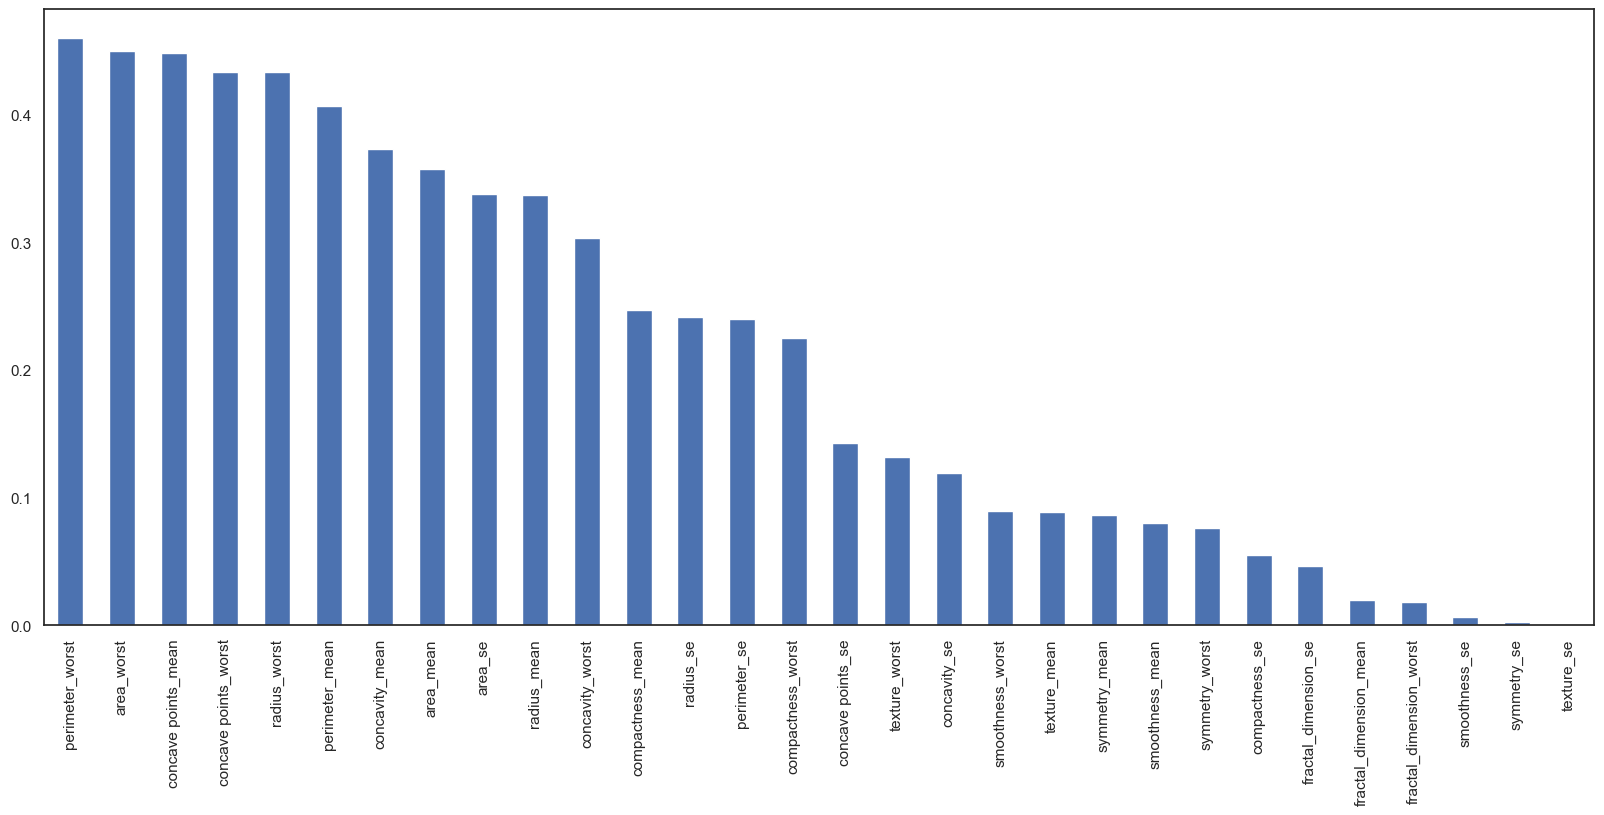

In [46]:
mutual_info_sorted, selected_features = apply_mutual_information_classification(X_train, y_train, k=5)
print("Mutual Information sorted:", mutual_info_sorted)
print("Selected features:", selected_features)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

selected = ['concave points_mean', 'radius_worst', 'perimeter_worst', 
            'area_worst', 'concave points_worst']

X = df[selected]
y = df['diagnosis']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)



Model accuracy score: 0.9211
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



The accuracy before applying information gain-based feature selection was 0.912.

After feature selection using information gain, the model accuracy increased to 0.9211.

This improvement suggests that the selected features based on information gain were more relevant and informative for the classification task.

#  chi-square test

The Chi-square test is suitable only for categorical attributes. Since our data comprises numerical variables, using the Chi-square test may yield inaccurate results. Therefore, it would be prudent to opt for the ANOVA test, which is better suited for numerical data analysis and is expected to provide more accurate and reliable results.

In [49]:
from sklearn.feature_selection import chi2
import pandas as pd

def apply_chi_square_test(X_train, y_train):
    # Perform chi2 test
    f_score, p_values = chi2(X_train, y_train)
    
    # Create a pandas Series for p-values
    p_values_series = pd.Series(p_values, index=X_train.columns)
    
    # Sort p-values in descending order
    p_values_sorted = p_values_series.sort_values(ascending=False)
    
    return p_values_sorted

# Example usage:
sorted_p_values = apply_chi_square_test(X_train, y_train)
print("Sorted p-values:", sorted_p_values)

Sorted p-values: fractal_dimension_mean    0.99
symmetry_se               0.99
fractal_dimension_se      0.96
smoothness_se             0.95
texture_se                0.85
smoothness_mean           0.73
fractal_dimension_worst   0.68
concave points_se         0.66
symmetry_mean             0.65
smoothness_worst          0.58
compactness_se            0.52
concavity_se              0.45
symmetry_worst            0.30
compactness_mean          0.04
concave points_mean       0.00
concave points_worst      0.00
concavity_mean            0.00
compactness_worst         0.00
radius_se                 0.00
concavity_worst           0.00
texture_mean              0.00
texture_worst             0.00
perimeter_se              0.00
radius_mean               0.00
radius_worst              0.00
perimeter_mean            0.00
area_worst                0.00
perimeter_worst           0.00
area_mean                 0.00
area_se                   0.00
dtype: float64


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_columns = ['symmetry_se', 'fractal_dimension_se', 'smoothness_se', 
                    'texture_se', 'smoothness_mean', 'fractal_dimension_worst', 
                    'concave points_se', 'symmetry_mean', 'smoothness_worst', 
                    'compactness_se', 'concavity_se', 'symmetry_worst', 
                    'compactness_mean']

X = df[selected_columns]
y = df['diagnosis']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.7456
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        67
           1       0.74      0.60      0.66        47

    accuracy                           0.75       114
   macro avg       0.74      0.72      0.73       114
weighted avg       0.74      0.75      0.74       114



The decrease in model accuracy from 0.91 to 0.7456 after performing the Chi-square test on numerical attributes suggests that utilizing this test on such data negatively impacted the models predictive performance because it is primarily designed for categorical attributes and loses information.

# ANOVA TEST

In [55]:
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import pandas as pd

def apply_anova_feature_selection(X, y, k=5):
    fs = SelectKBest(score_func=f_classif, k=k)
    fs.fit(X, y)
    support = fs.get_support()
    num_selected_features = support.sum()
    feature_score = pd.DataFrame({
        "Input_Features": X.columns,
        "Score": fs.scores_,
        "P_Value": np.round(fs.pvalues_, 4)
    })
    top_features = feature_score.nlargest(k, columns="Score")
    selected_features = top_features["Input_Features"].tolist()  # Extract selected feature names
    return support, num_selected_features, selected_features

# Example usage:
support, num_selected_features, selected_features = apply_anova_feature_selection(X, y, k=10)
print("Support:", support)
print("Number of selected features:", num_selected_features)
print("Selected features:", selected_features)


Support: [False  True False False  True  True  True  True  True  True  True  True
  True]
Number of selected features: 10
Selected features: ['compactness_mean', 'smoothness_worst', 'symmetry_worst', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se', 'fractal_dimension_se']


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selected features
selected_features = ['compactness_mean', 'smoothness_worst', 'symmetry_worst', 'concave points_se', 
                     'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 
                     'concavity_se', 'fractal_dimension_se']

X = df[selected_features]
y = df['diagnosis']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.8246
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        67
           1       0.79      0.79      0.79        47

    accuracy                           0.82       114
   macro avg       0.82      0.82      0.82       114
weighted avg       0.82      0.82      0.82       114



The decrease in model accuracy from 0.91 to 0.8246 after performing feature selection using the ANOVA test with k=10 suggests that the selected subset of features might not adequately capture the underlying patterns in the data for accurate classification.

# 2.WRAPPER METHOD

# FORWARD FEATURE SELECTION

In [59]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

def forward_feature_selection(X_train, y_train, k_features=6, cv=5, scoring='accuracy'):
   
    clf = RandomForestClassifier(n_jobs=-1)

    forward_feature_selector = SequentialFeatureSelector(clf,
                                                         k_features=k_features,
                                                         forward=True,
                                                         floating=False,
                                                         scoring=scoring,
                                                         cv=cv)

    forward_feature_selector.fit(X_train, y_train)

    selected_feature_names = forward_feature_selector.k_feature_names_

    selected_score = forward_feature_selector.k_score_

    return selected_feature_names, selected_score


In [60]:
selected_names, score = forward_feature_selection(X_train, y_train)
print("Selected Feature Names:", selected_names)
print("Score of Selected Features:", score)

Selected Feature Names: ('radius_mean', 'texture_mean', 'symmetry_mean', 'texture_worst', 'area_worst', 'concave points_worst')
Score of Selected Features: 0.9714285714285715


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the selected features
selected_features = ['radius_mean', 'texture_mean', 'symmetry_mean', 
                     'texture_worst', 'area_worst', 'concave points_worst']

# Extract feature matrix X and target vector y from your dataset
X = df[selected_features]
y = df['diagnosis']
def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)



Model accuracy score: 0.9474
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



The accuracy of the model improved from 91.28% to 94.74% after we picked out the most important features. This means that by focusing on these key features, the model became better at getting predictions right. Its like focusing on the most relevant information in a task, which helps us perform better overall. So, selecting the right features made our model more accurate in its predictions.

# BACKWARD FEATURE SELECTION

In [62]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

def backward_feature_selection(X_train, y_train, num_features=8, cv=5, scoring='accuracy'):
    clf = RandomForestClassifier(n_jobs=-1)
    feature_selector = SequentialFeatureSelector(clf,
                                                 k_features=num_features,
                                                 forward=False,
                                                 floating=False,
                                                 scoring=scoring,
                                                 cv=cv)
    feature_selector.fit(X_train, y_train)
    selected_features = feature_selector.k_feature_names_
    selected_score = feature_selector.k_score_
    return selected_features, selected_score

selected_features, score = backward_feature_selection(X_train, y_train)
print("Selected Features:", selected_features)
print("Score of Selected Features:", score)


Selected Features: ('texture_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst')
Score of Selected Features: 0.9780219780219781


In [63]:
selected_features = ['texture_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst']
X = df[selected_features]
y = df['diagnosis']
def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.9474
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In simpler terms, both backward and forward feature selection methods resulted in the same improved accuracy score of 0.9474 compared to the initial accuracy of 0.91. This indicates that carefully selecting a subset of the most relevant features boosted our models performance.
Although the specific features chosen by each method were not exactly the same, they both identified important features that contributed to better predictions. So, whether we removed features one by one or added them step by step, we ended up with a set of features that helped our model perform better.

# RECURSIVE FEATURE ELIMINATION

In [68]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

def recursive_feature_elimination(X, y, estimator, n_features_to_select):
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    selected_features = [col for i, col in zip(range(X.shape[1]), X.columns) if rfe.support_[i]]
    feature_rankings = {col: rank for col, rank in zip(X.columns, rfe.ranking_)}
    return selected_features, feature_rankings


In [69]:
selected_features, feature_rankings = recursive_feature_elimination(X, y, estimator=DecisionTreeClassifier(), n_features_to_select=5)
print("Selected features:", selected_features)
print("Feature rankings:", feature_rankings)

Selected features: ['texture_mean', 'texture_se', 'area_worst', 'smoothness_worst', 'concavity_worst']
Feature rankings: {'texture_mean': 1, 'symmetry_mean': 4, 'radius_se': 3, 'texture_se': 1, 'texture_worst': 2, 'area_worst': 1, 'smoothness_worst': 1, 'concavity_worst': 1}


In [70]:

selected_features = ['texture_mean', 'texture_se', 'area_worst', 'smoothness_worst', 'concavity_worst']
X = df[selected_features]
y = df['diagnosis']
def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)

Model accuracy score: 0.9386
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.90      0.96      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



The increase in accuracy from 0.91 to 0.9386 after using Recursive Feature Elimination (RFE) suggests that RFE has effectively selected a subset of features that are more relevant for the classification task. By eliminating less important features, RFE helped improve the model's predictive performance.

Additionally, the observation that RFE is fast implies that it efficiently identifies the most informative features while reducing computational overhead. This makes RFE a practical and efficient feature selection technique for enhancing model accuracy.

# PCA ( Dimensionality Reduction)

In [74]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def apply_knn_with_pca(X_train, X_test, y_train, y_test, n_components=5, n_neighbors=5):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn_with_pca = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_with_pca.fit(X_train_pca, y_train)

    y_pred_pca = knn_with_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    return accuracy_pca, y_pred_pca

accuracy, y_pred = apply_knn_with_pca(X_train, X_test, y_train, y_test)
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy * 100))

# Classification report
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred))


Classification Accuracy with PCA: 93.86%
Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Before PCA, the classification accuracy of KNN was 91%, and after applying PCA, it improved to 93.86%.
This improvement in accuracy after PCA suggests that the PCA transformation helped in reducing the dimensionality of the data while still preserving most of its useful information, which in turn improved the performance of your KNN classifier.

# CONCLUSION

1.Cross-validation: The accuracy of the K-nearest neighbors (KNN) model improved slightly from 91.23% to 92.62% after performing cross-validation. This indicates that the model's performance is robust and generalizes well across different subsets of the data.

2.Information Gain-based Feature Selection: The accuracy improved from 91.2% to 92.11% after feature selection using information gain, suggesting that the selected features were more relevant for the classification task, enhancing the model's predictive performance.

3.Chi-square Test and ANOVA Test: The decrease in accuracy after applying the Chi-square test on numerical attributes (from 91% to 74.56%) and ANOVA test with k=10 (from 91% to 82.46%) suggests that these methods might not be suitable for the data, possibly due to loss of information or inadequacy in capturing underlying patterns.

4.Feature Selection Methods (Backward, Forward, Recursive Feature Elimination): Both backward and forward feature selection methods resulted in an improved accuracy score of 94.74% compared to the initial accuracy of 91%. This indicates that carefully selecting a subset of relevant features boosted the model's performance, regardless of the specific method used.

5.Recursive Feature Elimination (RFE): RFE improved accuracy from 91% to 93.86% by selecting a subset of more relevant features, effectively enhancing the model's predictive performance while reducing computational overhead.

6.Principal Component Analysis (PCA): PCA improved the classification accuracy of KNN from 91% to 93.86%. This suggests that PCA helped in reducing the dimensionality of the data while retaining most of its useful information, consequently enhancing the KNN classifier's performance.

Overall, these interpretations suggest that Information Gain, Recursive Feature Elimination (RFE), Forward and Backward feature selection, and Principal Component Analysis (PCA) enhance the performance of the KNN classifier, improving its accuracy.